In [2]:
import numpy as np
import operator

In [8]:
def createDataset():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [9]:
group,labels = createDataset()

In [10]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [11]:
labels

['A', 'A', 'B', 'B']

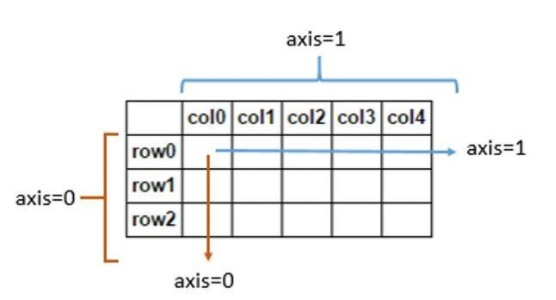

In [28]:
def classify0(inX, dataSet, labels, k):
    # shape[0]：表示矩阵的行数
    # shape[1]：表示矩阵的列数
    dataSetSize = dataSet.shape[0]
    print(dataSetSize)
    # 距离计算
    # np.tile(a,(2,1))第一个参数为Y轴扩大倍数，第二个为X轴扩大倍数。
    # np.tile（a,(2)）函数的作用就是将函数将函数沿着X轴扩大两倍。如果扩大倍数只有一个，默认为X轴
    diffMat = np.tile(inX, (dataSetSize,1))-dataSet
    print(diffMat)
    sqDiffMat = diffMat ** 2
    print(sqDiffMat)
    sqDistances = sqDiffMat.sum(axis=1)
    print(sqDistances)
    distances = sqDistances ** 0.5
    # argsort函数返回的是数组值从小到大的索引值
    # 
    sortedDistIndicies = distances.argsort()
    print(sortedDistIndicies)
    # 选择距离最小的k个点
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        print("voteIlabel",voteIlabel)
        classCount[voteIlabel]= classCount.get(voteIlabel,0) +1
    # 排序
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
    print("sortedClassCount",sortedClassCount)
    return sortedClassCount[0][0]

In [29]:
classify0([0,8], group, labels,3)

4
[[-1.   6.9]
 [-1.   7. ]
 [ 0.   8. ]
 [ 0.   7.9]]
[[ 1.   47.61]
 [ 1.   49.  ]
 [ 0.   64.  ]
 [ 0.   62.41]]
[48.61 50.   64.   62.41]
[0 1 3 2]
voteIlabel A
voteIlabel A
voteIlabel B
sortedClassCount [('A', 2), ('B', 1)]


'A'